In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
attendance_file = "/content/attendance.csv"
link_attraction_file = "/content/link_attraction_park.csv"
weather_file = "/content/weather_data.csv"
waiting_file = "/content/waiting_times.csv"

In [ ]:
attendance = pd.read_csv(attendance_file)
link_attraction = pd.read_csv(link_attraction_file, sep=';')
weather = pd.read_csv(weather_file)
waiting_time = pd.read_csv(waiting_file)

1. Attendance

In [ ]:
attendance.head()

,USAGE_DATE,FACILITY_NAME,attendance
0,2018-06-01,PortAventura World,46804
1,2018-06-01,Tivoli Gardens,20420
2,2018-06-02,PortAventura World,57940
3,2018-06-02,Tivoli Gardens,29110
4,2018-06-03,PortAventura World,44365


In [ ]:
#Printing information of the attendance dataset
attendance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2367 entries, 0 to 2366
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   USAGE_DATE     2367 non-null   object
 1   FACILITY_NAME  2367 non-null   object
 2   attendance     2367 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 55.6+ KB


In [ ]:
#Printing the different falicity names
print(attendance['FACILITY_NAME'].unique())

['PortAventura World' 'Tivoli Gardens']


In [ ]:
#Filtering on PortAventura World only
attendance = attendance[attendance['FACILITY_NAME'] == 'PortAventura World']

In [ ]:
#Cleaning the dataset
#Droppnig the column "Falicity Name" since it only hold PortAventura World
attendance.drop(columns='FACILITY_NAME', inplace=True)
attendance.head()

<ipython-input-8-55ffbee295f1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attendance.drop(columns='FACILITY_NAME', inplace=True)


,USAGE_DATE,attendance
0,2018-06-01,46804
2,2018-06-02,57940
4,2018-06-03,44365
6,2018-06-04,37617
8,2018-06-05,32438


In [ ]:
#Converting the data into data format using pandas
attendance['USAGE_DATE'] = pd.to_datetime(attendance['USAGE_DATE'], format="%Y-%m-%d")
attendance.head()

<ipython-input-9-2d2e5e86c47a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attendance['USAGE_DATE'] = pd.to_datetime(attendance['USAGE_DATE'], format="%Y-%m-%d")


,USAGE_DATE,attendance
0,2018-06-01,46804
2,2018-06-02,57940
4,2018-06-03,44365
6,2018-06-04,37617
8,2018-06-05,32438


In [ ]:
# Removing negative values by converting to zero
attendance.loc[attendance['attendance'] < 0, 'attendance'] = 0
attendance

,USAGE_DATE,attendance
0,2018-06-01,46804
2,2018-06-02,57940
4,2018-06-03,44365
6,2018-06-04,37617
8,2018-06-05,32438
...,...,...
2357,2022-07-22,49586
2359,2022-07-23,51748
2361,2022-07-24,45261
2363,2022-07-25,53764


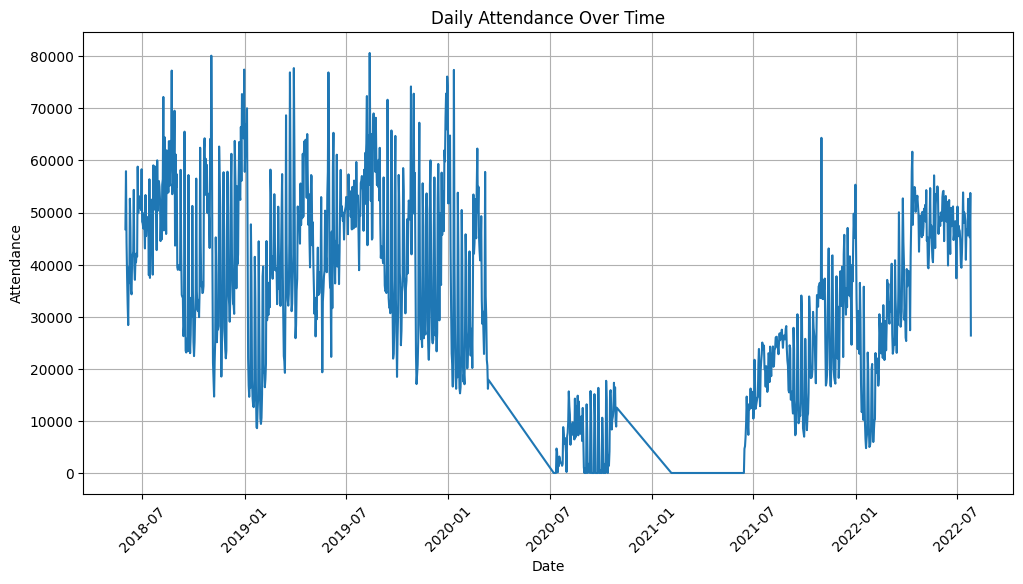

In [ ]:
#Plotting for visualization
plt.figure(figsize=(12, 6))
sns.lineplot(x=attendance["USAGE_DATE"], y=attendance["attendance"])

plt.xlabel("Date")
plt.ylabel("Attendance")
plt.title("Daily Attendance Over Time")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

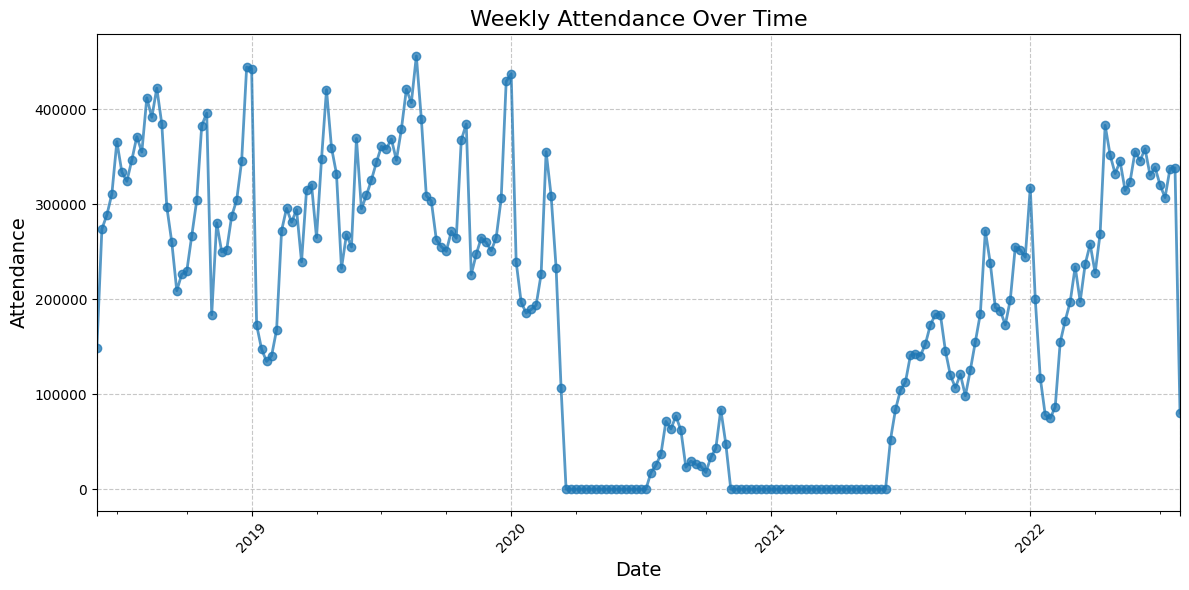

In [ ]:
#Plotting attendance over time by week for better visualization
weekly_attendance = attendance.groupby(pd.Grouper(key="USAGE_DATE", freq="W"))["attendance"].sum()

plt.figure(figsize=(12, 6))
weekly_attendance.plot(kind="line", marker="o", linewidth=2, alpha=0.75)
plt.title("Weekly Attendance Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Attendance", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-13-208166f5ae28>:2: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_attendance = attendance.groupby(pd.Grouper(key="USAGE_DATE", freq="m"))["attendance"].sum()


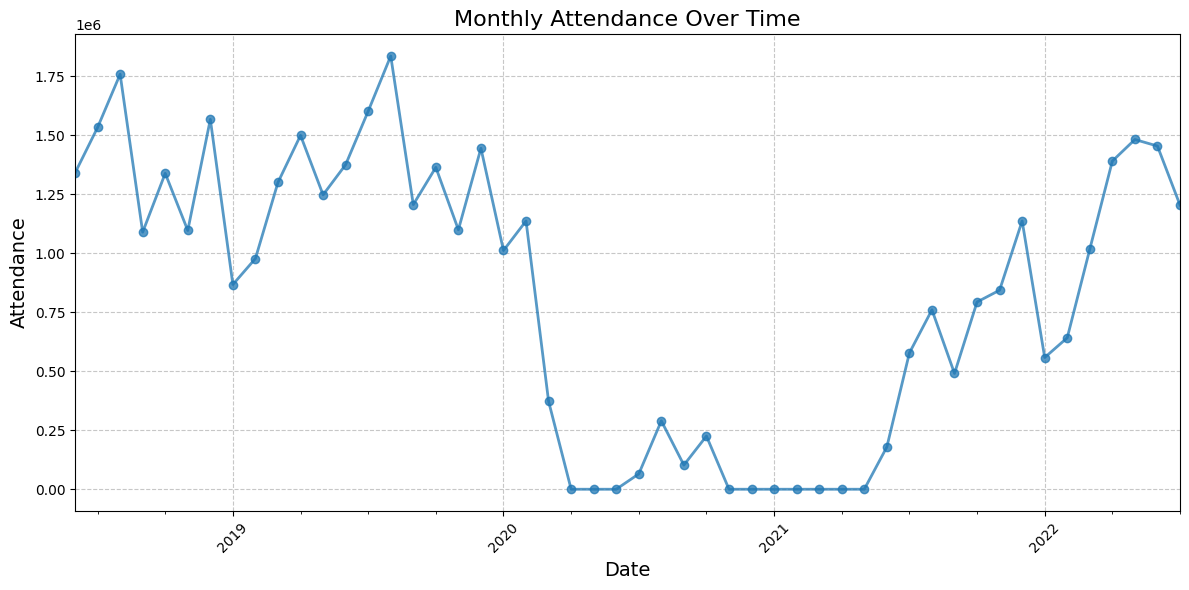

In [ ]:
#Plotting attendance over time by month for better visualization
monthly_attendance = attendance.groupby(pd.Grouper(key="USAGE_DATE", freq="m"))["attendance"].sum()

plt.figure(figsize=(12, 6))
monthly_attendance.plot(kind="line", marker="o", linewidth=2, alpha=0.75)
plt.title("Monthly Attendance Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Attendance", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
#Defining COVID period
start_covid = '2020-07-01'
end_covid = '2021-06-15'

attendance_pre_covid = attendance[attendance['USAGE_DATE'] < start_covid]
attendance_post_covid = attendance[attendance['USAGE_DATE'] > end_covid]

<ipython-input-15-320be4d7eeec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data['USAGE_DATE'].dt.month
<ipython-input-15-320be4d7eeec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data['USAGE_DATE'].dt.month


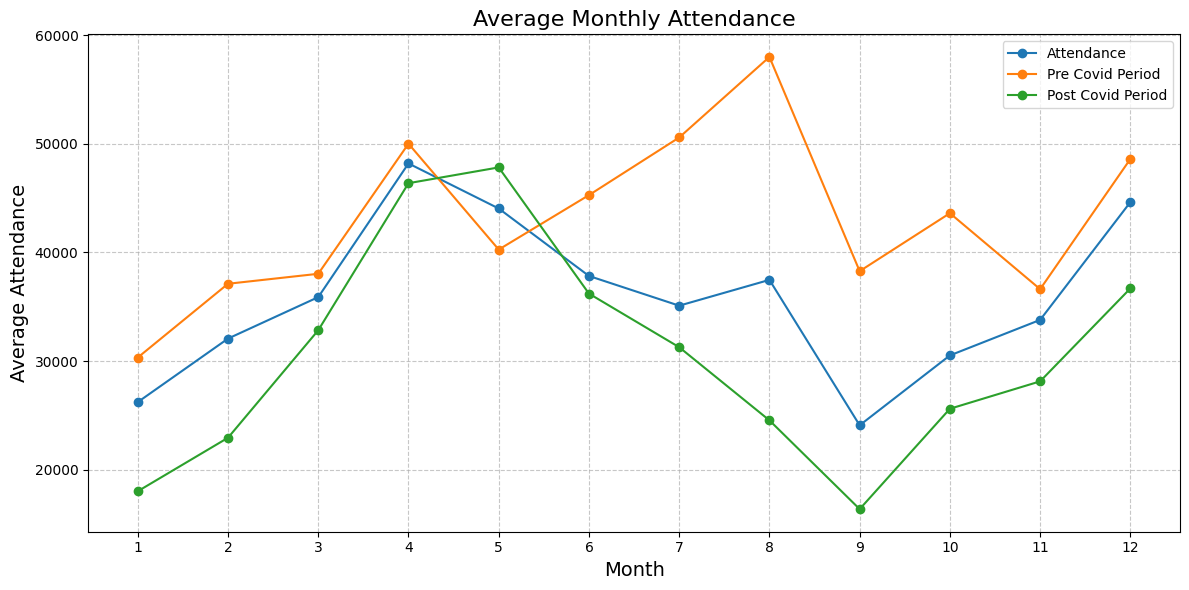

In [ ]:
#Computing average monthly attendance
#First, adding columns for each months
for data in [attendance, attendance_pre_covid, attendance_post_covid]:
  data['Month'] = data['USAGE_DATE'].dt.month

monthly_attendance_avg = {
    'Attendance': attendance.groupby('Month')['attendance'].mean(),
    'Pre Covid Period': attendance_pre_covid.groupby('Month')['attendance'].mean(),
    'Post Covid Period': attendance_post_covid.groupby('Month')['attendance'].mean()
}

#Plotting the average monthly attendance
plt.figure(figsize=(12, 6))
for label, series in monthly_attendance_avg.items():
    plt.plot(series.index, series.values, marker="o", label=label)
plt.title("Average Monthly Attendance", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Average Attendance", fontsize=14)
plt.legend()
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

<ipython-input-16-723a90ad460c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['WeekDay'] = data['USAGE_DATE'].dt.day_name()
<ipython-input-16-723a90ad460c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['WeekDay'] = data['USAGE_DATE'].dt.day_name()


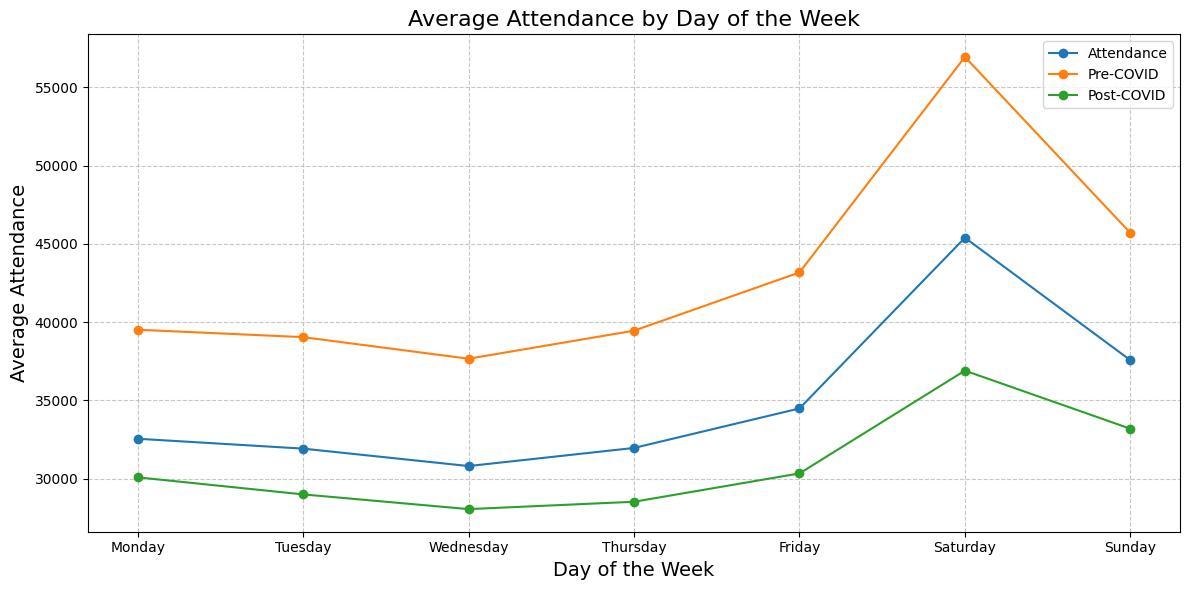

In [ ]:
#Computing average daily attendance
#First, adding columns for each days
for data in [attendance, attendance_pre_covid, attendance_post_covid]:
  data['WeekDay'] = data['USAGE_DATE'].dt.day_name()

day_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

daily_attendance_avg = {
    label: series.groupby(series.index).mean().reindex(day_order)
    for label, series in {
        "Attendance": attendance.groupby('WeekDay')["attendance"].mean(),
        "Pre-COVID": attendance_pre_covid.groupby('WeekDay')["attendance"].mean(),
        "Post-COVID": attendance_post_covid.groupby('WeekDay')["attendance"].mean(),
    }.items()
}

#Plotting the average daily attendance
plt.figure(figsize=(12, 6))
for label, series in daily_attendance_avg.items():
    plt.plot(series.index, series.values, marker="o", label=label)
plt.title("Average Attendance by Day of the Week", fontsize=16)
plt.xlabel("Day of the Week", fontsize=14)
plt.ylabel("Average Attendance", fontsize=14)
plt.legend()
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

2. Link attraction

In [ ]:
link_attraction.head()

,ATTRACTION,PARK
0,Aeroplane Ride,Tivoli Gardens
1,Bumper Cars,PortAventura World
2,Bungee Jump,PortAventura World
3,Circus Train,PortAventura World
4,Crazy Bus,Tivoli Gardens


In [ ]:
link_attraction['PARK'].unique()

array(['Tivoli Gardens', 'PortAventura World'], dtype=object)

In [ ]:
#Filtering on PortAventura World
link_attraction = link_attraction[link_attraction['PARK'] == 'PortAventura World']
link_attraction

,ATTRACTION,PARK
1,Bumper Cars,PortAventura World
2,Bungee Jump,PortAventura World
3,Circus Train,PortAventura World
5,Crazy Dance,PortAventura World
6,Dizzy Dropper,PortAventura World
7,Drop Tower,PortAventura World
8,Flying Coaster,PortAventura World
9,Free Fall,PortAventura World
10,Giant Wheel,PortAventura World
11,Giga Coaster,PortAventura World


In [ ]:
#Converting into a list to store the attraction of the park
attractions = link_attraction['ATTRACTION'].tolist()
attractions

['Bumper Cars',
 'Bungee Jump',
 'Circus Train',
 'Crazy Dance',
 'Dizzy Dropper',
 'Drop Tower',
 'Flying Coaster',
 'Free Fall',
 'Giant Wheel',
 'Giga Coaster',
 'Go-Karts',
 'Haunted House',
 'Himalaya Ride',
 'Inverted Coaster',
 'Kiddie Coaster',
 'Merry Go Round',
 'Oz Theatre',
 'Rapids Ride',
 'Roller Coaster',
 'Spinning Coaster',
 'Spiral Slide',
 'Superman Ride',
 'Swing Ride',
 'Vertical Drop',
 'Water Ride',
 'Zipline']

3. Weather

In [ ]:
weather.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,915148800,1999-01-01 00:00:00 +0000 UTC,3600,Custom location,48.873492,2.295104,8.33,NaN,3.39,5.28,...,NaN,NaN,NaN,NaN,NaN,8,800,Clear,sky is clear,01n
1,915152400,1999-01-01 01:00:00 +0000 UTC,3600,Custom location,48.873492,2.295104,8.08,NaN,3.54,5.18,...,NaN,NaN,NaN,NaN,NaN,6,800,Clear,sky is clear,01n
2,915156000,1999-01-01 02:00:00 +0000 UTC,3600,Custom location,48.873492,2.295104,8.08,NaN,4.11,5.38,...,NaN,NaN,NaN,NaN,NaN,14,801,Clouds,few clouds,02n
3,915159600,1999-01-01 03:00:00 +0000 UTC,3600,Custom location,48.873492,2.295104,7.31,NaN,3.73,4.42,...,NaN,NaN,NaN,NaN,NaN,39,802,Clouds,scattered clouds,03n
4,915163200,1999-01-01 04:00:00 +0000 UTC,3600,Custom location,48.873492,2.295104,6.91,NaN,3.53,4.00,...,NaN,NaN,NaN,NaN,NaN,52,803,Clouds,broken clouds,04n


In [ ]:
#Data Cleaning
weather['dt_iso'] = weather['dt_iso'].str.split('+').str[0]
weather['Date'] = pd.to_datetime(weather['dt_iso'].str.split(' ').str[0])
weather['Hour'] = weather['dt_iso'].str.split(' ').str[1]
weather['Hour'] = weather['Hour'].str.split(':').str[0].astype(int)
weather = weather[['dt_iso', 'Date', 'Hour', 'temp', 'temp_min', 'temp_max', 'humidity', 'wind_speed', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h', 'clouds_all', 'weather_main']]
weather

,dt_iso,Date,Hour,temp,temp_min,temp_max,humidity,wind_speed,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_main
0,1999-01-01 00:00:00,1999-01-01,0,8.33,8.14,9.32,71,5.57,NaN,NaN,NaN,NaN,8,Clear
1,1999-01-01 01:00:00,1999-01-01,1,8.08,7.94,9.32,73,5.02,NaN,NaN,NaN,NaN,6,Clear
2,1999-01-01 02:00:00,1999-01-01,2,8.08,7.94,8.74,76,4.56,NaN,NaN,NaN,NaN,14,Clouds
3,1999-01-01 03:00:00,1999-01-01,3,7.31,7.14,8.62,78,4.56,NaN,NaN,NaN,NaN,39,Clouds
4,1999-01-01 04:00:00,1999-01-01,4,6.91,6.74,8.32,79,4.40,NaN,NaN,NaN,NaN,52,Clouds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207259,2022-08-23 19:00:00,2022-08-23,19,24.89,23.74,25.86,67,1.34,NaN,NaN,NaN,NaN,100,Clouds
207260,2022-08-23 20:00:00,2022-08-23,20,23.06,21.38,24.86,74,0.70,NaN,NaN,NaN,NaN,100,Clouds
207261,2022-08-23 21:00:00,2022-08-23,21,21.83,19.71,23.86,81,0.70,NaN,NaN,NaN,NaN,100,Clouds
207262,2022-08-23 22:00:00,2022-08-23,22,21.08,19.90,22.86,85,0.70,NaN,NaN,NaN,NaN,100,Clouds


In [ ]:
weather['dt_iso'] = pd.to_datetime(weather['dt_iso'])

In [ ]:
weather

,dt_iso,Date,Hour,temp,temp_min,temp_max,humidity,wind_speed,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_main
0,1999-01-01 00:00:00,1999-01-01,0,8.33,8.14,9.32,71,5.57,NaN,NaN,NaN,NaN,8,Clear
1,1999-01-01 01:00:00,1999-01-01,1,8.08,7.94,9.32,73,5.02,NaN,NaN,NaN,NaN,6,Clear
2,1999-01-01 02:00:00,1999-01-01,2,8.08,7.94,8.74,76,4.56,NaN,NaN,NaN,NaN,14,Clouds
3,1999-01-01 03:00:00,1999-01-01,3,7.31,7.14,8.62,78,4.56,NaN,NaN,NaN,NaN,39,Clouds
4,1999-01-01 04:00:00,1999-01-01,4,6.91,6.74,8.32,79,4.40,NaN,NaN,NaN,NaN,52,Clouds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207259,2022-08-23 19:00:00,2022-08-23,19,24.89,23.74,25.86,67,1.34,NaN,NaN,NaN,NaN,100,Clouds
207260,2022-08-23 20:00:00,2022-08-23,20,23.06,21.38,24.86,74,0.70,NaN,NaN,NaN,NaN,100,Clouds
207261,2022-08-23 21:00:00,2022-08-23,21,21.83,19.71,23.86,81,0.70,NaN,NaN,NaN,NaN,100,Clouds
207262,2022-08-23 22:00:00,2022-08-23,22,21.08,19.90,22.86,85,0.70,NaN,NaN,NaN,NaN,100,Clouds


In [ ]:
#Average daily temp
avg_weather = weather.groupby('Date').agg(
    {'temp': 'mean',
     'humidity': 'mean',
     'wind_speed': 'mean',
     'rain_1h': 'sum',
     'snow_1h': 'sum',
     'clouds_all': 'sum'})
avg_weather

,temp,humidity,wind_speed,rain_1h,snow_1h,clouds_all
Date,,,,,,
1999-01-01,7.954167,82.541667,4.182500,0.00,0.0,1255
1999-01-02,7.442500,87.916667,6.901250,3.43,0.0,2073
1999-01-03,7.706250,82.708333,6.913750,6.07,0.0,2012
1999-01-04,12.067500,93.583333,6.536667,5.00,0.0,2347
1999-01-05,11.275833,88.083333,3.827917,0.00,0.0,1259
...,...,...,...,...,...,...
2022-08-19,19.668750,83.666667,3.806667,0.00,0.0,1758
2022-08-20,18.896667,75.625000,2.358333,0.00,0.0,833
2022-08-21,20.212500,67.666667,2.025833,0.00,0.0,1970


In [ ]:
avg_weather = avg_weather[['temp', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all']]

In [ ]:
weather_attendance = attendance.merge(avg_weather, how='left', left_on='USAGE_DATE', right_on='Date')
weather_attendance

,USAGE_DATE,attendance,Month,WeekDay,temp,humidity,wind_speed,rain_1h,snow_1h,clouds_all
0,2018-06-01,46804,6,Friday,17.887500,89.916667,2.472917,5.17,0.0,2379
1,2018-06-02,57940,6,Saturday,19.352500,77.541667,1.468750,0.00,0.0,1019
2,2018-06-03,44365,6,Sunday,20.275833,72.666667,2.939167,0.00,0.0,1411
3,2018-06-04,37617,6,Monday,20.721667,74.791667,2.471250,0.15,0.0,2137
4,2018-06-05,32438,6,Tuesday,18.089583,84.791667,3.377917,3.86,0.0,2367
...,...,...,...,...,...,...,...,...,...,...
1177,2022-07-22,49586,7,Friday,20.585000,85.375000,2.695417,3.49,0.0,1882
1178,2022-07-23,51748,7,Saturday,21.707083,80.333333,2.080417,0.00,0.0,1971
1179,2022-07-24,45261,7,Sunday,24.897917,68.333333,2.233750,0.00,0.0,640
1180,2022-07-25,53764,7,Monday,22.689583,67.791667,4.442917,0.11,0.0,1454


            attendance      temp  humidity  wind_speed   rain_1h   snow_1h  \
attendance    1.000000  0.051520 -0.183542   -0.067173 -0.091546 -0.056346   
temp          0.051520  1.000000 -0.641122   -0.214862 -0.065218 -0.166915   
humidity     -0.183542 -0.641122  1.000000    0.177748  0.359076  0.074368   
wind_speed   -0.067173 -0.214862  0.177748    1.000000  0.325814  0.024895   
rain_1h      -0.091546 -0.065218  0.359076    0.325814  1.000000  0.008686   
snow_1h      -0.056346 -0.166915  0.074368    0.024895  0.008686  1.000000   
clouds_all   -0.065418 -0.242804  0.584570    0.231753  0.398982  0.088539   

            clouds_all  
attendance   -0.065418  
temp         -0.242804  
humidity      0.584570  
wind_speed    0.231753  
rain_1h       0.398982  
snow_1h       0.088539  
clouds_all    1.000000  


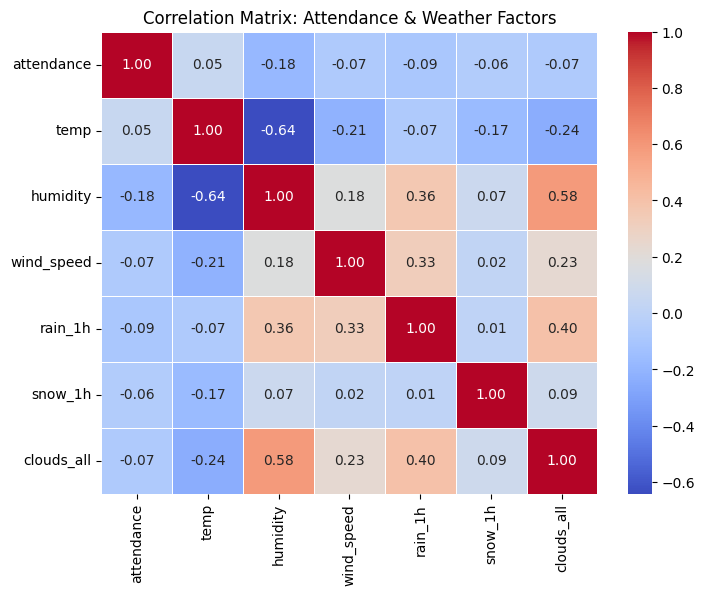

In [ ]:
corr_matrix = weather_attendance[['attendance','temp','humidity','wind_speed','rain_1h', 'snow_1h', 'clouds_all']].corr()
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Attendance & Weather Factors")
plt.show()

4. Waiting Time

In [ ]:
waiting_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3509324 entries, 0 to 3509323
Data columns (total 14 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   WORK_DATE                 object 
 1   DEB_TIME                  object 
 2   DEB_TIME_HOUR             int64  
 3   FIN_TIME                  object 
 4   ENTITY_DESCRIPTION_SHORT  object 
 5   WAIT_TIME_MAX             int64  
 6   NB_UNITS                  float64
 7   GUEST_CARRIED             float64
 8   CAPACITY                  float64
 9   ADJUST_CAPACITY           float64
 10  OPEN_TIME                 int64  
 11  UP_TIME                   int64  
 12  DOWNTIME                  int64  
 13  NB_MAX_UNIT               float64
dtypes: float64(5), int64(5), object(4)
memory usage: 374.8+ MB


In [ ]:
waiting_time.head()

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT
0,2018-01-01,2018-01-01 21:00:00.000,21,2018-01-01 21:15:00.000,Roller Coaster,0,2.0,0.0,0.000,0.00,0,0,0,2.0
1,2018-01-01,2018-01-01 19:30:00.000,19,2018-01-01 19:45:00.000,Bumper Cars,5,18.0,148.0,254.749,254.75,15,15,0,18.0
2,2018-01-01,2018-01-01 22:30:00.000,22,2018-01-01 22:45:00.000,Rapids Ride,0,1.0,0.0,0.000,0.00,0,0,0,2.0
3,2018-01-01,2018-01-01 12:45:00.000,12,2018-01-01 13:00:00.000,Crazy Dance,5,1.0,46.0,250.001,250.00,15,15,0,1.0
4,2018-01-01,2018-01-01 17:00:00.000,17,2018-01-01 17:15:00.000,Skyway,5,15.0,92.0,211.500,198.25,15,15,0,16.0


In [ ]:
#Cleaning
waiting_time['WORK_DATE'] = pd.to_datetime(waiting_time['WORK_DATE'])
waiting_time['DEB_TIME'] = waiting_time['DEB_TIME'].str.split('.').str[0]
waiting_time = waiting_time[waiting_time['ENTITY_DESCRIPTION_SHORT'].isin(attractions)]

In [ ]:
waiting_time['DEB_TIME'] = pd.to_datetime(waiting_time['DEB_TIME'])

In [ ]:
waiting_time['TIME'] = waiting_time['DEB_TIME'].dt.floor('H')
wait_time = waiting_time.groupby('TIME').agg(
    {
        'WAIT_TIME_MAX':'sum',
        'GUEST_CARRIED':'sum'
    }
)
wait_time

<ipython-input-58-51b271b82005>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  waiting_time['TIME'] = waiting_time['DEB_TIME'].dt.floor('H')


,WAIT_TIME_MAX,GUEST_CARRIED
TIME,,
2018-01-01 09:00:00,570,5607.9999
2018-01-01 10:00:00,1450,12354.0004
2018-01-01 11:00:00,2155,13327.9997
2018-01-01 12:00:00,2365,14408.5000
2018-01-01 13:00:00,2215,15331.5002
...,...,...
2022-08-18 18:00:00,1615,15074.0040
2022-08-18 19:00:00,1520,13798.0040
2022-08-18 20:00:00,1255,10837.6688


In [ ]:
weather_attendance_hourly = wait_time.merge(weather, how='left', left_on='TIME', right_on='dt_iso')
weather_attendance_hourly

,WAIT_TIME_MAX,GUEST_CARRIED,dt_iso,Date,Hour,temp,temp_min,temp_max,humidity,wind_speed,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_main
0,570,5607.9999,2018-01-01 09:00:00,2018-01-01,9,6.76,6.31,6.94,83,7.48,NaN,NaN,NaN,NaN,100,Clouds
1,1450,12354.0004,2018-01-01 10:00:00,2018-01-01,10,6.77,6.31,6.97,87,7.33,0.82,NaN,NaN,NaN,100,Rain
2,2155,13327.9997,2018-01-01 11:00:00,2018-01-01,11,6.35,5.86,7.32,91,9.69,2.01,NaN,NaN,NaN,100,Rain
3,2365,14408.5000,2018-01-01 12:00:00,2018-01-01,12,7.77,7.52,8.32,93,9.89,0.92,NaN,NaN,NaN,99,Rain
4,2215,15331.5002,2018-01-01 13:00:00,2018-01-01,13,8.34,7.86,9.32,93,9.12,0.82,NaN,NaN,NaN,83,Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23669,1615,15074.0040,2022-08-18 18:00:00,2022-08-18,18,26.09,24.47,27.23,66,2.77,NaN,NaN,NaN,NaN,100,Clouds
23670,1520,13798.0040,2022-08-18 19:00:00,2022-08-18,19,24.20,22.81,25.12,67,2.77,NaN,NaN,NaN,NaN,100,Clouds
23671,1255,10837.6688,2022-08-18 20:00:00,2022-08-18,20,22.67,21.86,23.45,72,4.20,NaN,NaN,NaN,NaN,100,Clouds
23672,1065,9814.5000,2022-08-18 21:00:00,2022-08-18,21,21.54,20.86,22.29,79,4.20,NaN,NaN,NaN,NaN,100,Clouds


               GUEST_CARRIED      temp  humidity  wind_speed   rain_1h  \
GUEST_CARRIED       1.000000  0.268807 -0.242709   -0.014762 -0.008006   
temp                0.268807  1.000000 -0.675224   -0.182806  0.050021   
humidity           -0.242709 -0.675224  1.000000    0.114577  0.182849   
wind_speed         -0.014762 -0.182806  0.114577    1.000000  0.047626   
rain_1h            -0.008006  0.050021  0.182849    0.047626  1.000000   
snow_1h            -0.124726 -0.099342  0.086106    0.365578       NaN   
clouds_all          0.031947 -0.219045  0.416584    0.155548  0.137001   

                snow_1h  clouds_all  
GUEST_CARRIED -0.124726    0.031947  
temp          -0.099342   -0.219045  
humidity       0.086106    0.416584  
wind_speed     0.365578    0.155548  
rain_1h             NaN    0.137001  
snow_1h        1.000000    0.186899  
clouds_all     0.186899    1.000000  


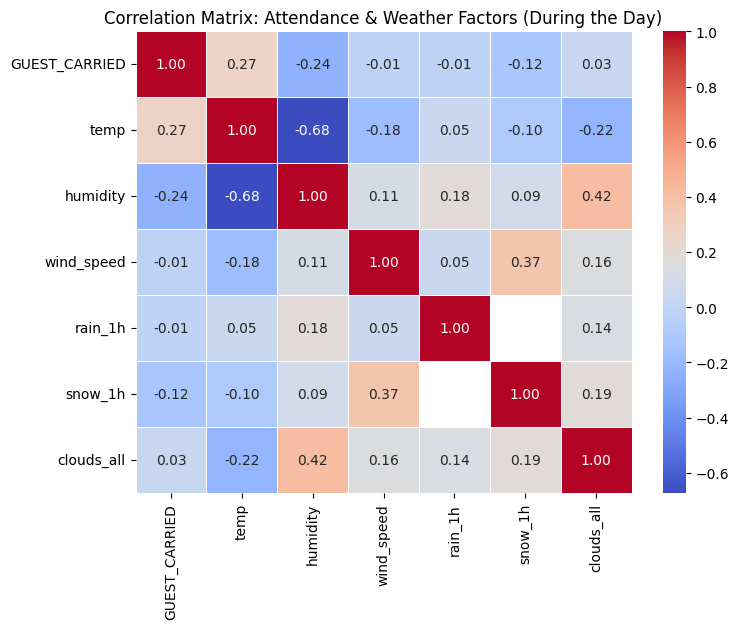

In [ ]:
corr_matrix_hourly = weather_attendance_hourly[['GUEST_CARRIED','temp','humidity','wind_speed','rain_1h', 'snow_1h', 'clouds_all']].corr()
print(corr_matrix_hourly)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_hourly, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Attendance & Weather Factors (During the Day)")
plt.show()